In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
def get_races():
    races = ['black', 'aapi', 'aian', 'white', 'hisp', 'other']
    races = [race+'_all' for race in races]
    return races


In [20]:
df['Neighborhood'].unique()

array(['Allston', 'Beacon Hill', 'Brighton', 'Downtown', 'Charlestown',
       'Chinatown', 'Dorchester', 'East Boston', 'Fenway', 'Hyde Park',
       'Jamaica Plain', 'Longwood', 'Mattapan', 'North End', 'Roslindale',
       'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End',
       'West End', 'West Roxbury'], dtype=object)

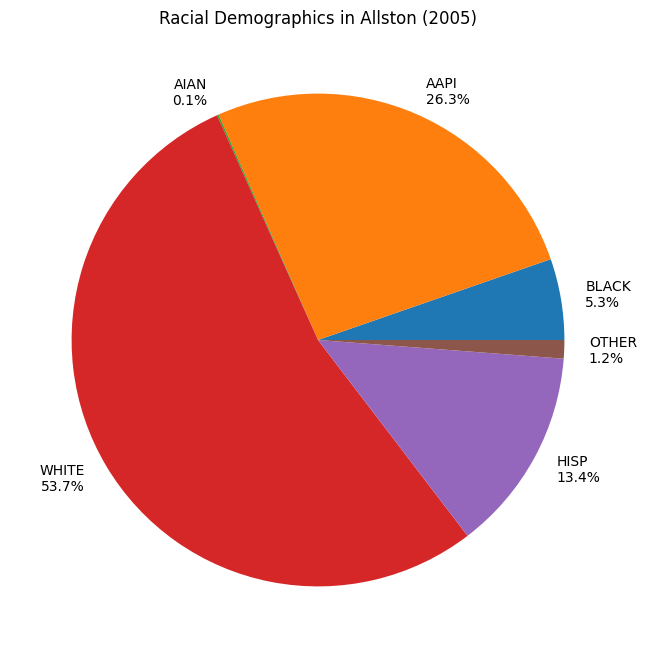

In [13]:
def pie_chart(year = 2005):
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    for neighborhood in df['Neighborhood'].unique():
        df = df[(df['Neighborhood'] == neighborhood) & (df['Year'] == year)]
        races = get_races()
        # Get the values for each race
        values = df[races].values[0]
        
        # Create labels with percentages
        total = values.sum()
        percentages = [f'{race.split("_")[0].upper()}\n{val/total*100:.1f}%' for race, val in zip(races, values)]
        
        # Create pie chart
        plt.figure(figsize=(10,8))
        plt.pie(values, labels=percentages, autopct='')
        plt.title(f'Racial Demographics in {neighborhood} ({year})')
        plt.show()
        break
pie_chart()

# How has corporate ownership affected various demographic groups?
- compare racial breakdown through time (not possible)
- compare the racial breakdown of a gentrified and non gentrified area (owned by companies)
- compare the age population of gentrigied and non gentrified
- do correlation between corp ownership adn age, corp ownership and non white race

[ 2396  9218    40 20456  3643   388]


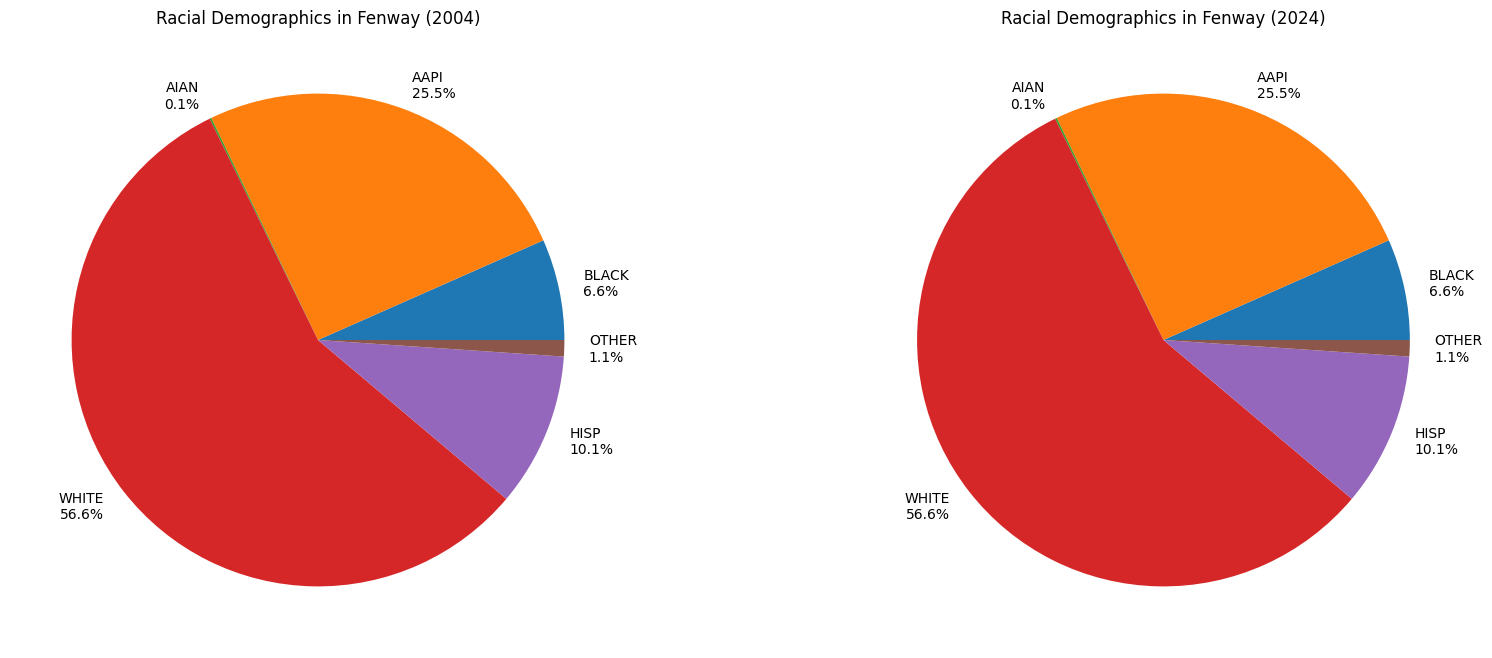

In [23]:
def pie_chart(neighborhood):
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    df = df[df['Neighborhood'] == neighborhood]
    
    # Get earliest and latest years
    earliest_year = df['Year'].min()
    latest_year = df['Year'].max()
    
    # Create subplot with 2 pie charts side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    
    # Plot earliest year
    early_df = df[df['Year'] == earliest_year]
    races = get_races()
    values = early_df[races].values[0]
    print(values)
    total = values.sum()
    percentages = [f'{race.split("_")[0].upper()}\n{val/total*100:.1f}%' for race, val in zip(races, values)]
    ax1.pie(values, labels=percentages, autopct='')
    ax1.set_title(f'Racial Demographics in {neighborhood} ({earliest_year})')
    
    # Plot latest year  
    late_df = df[df['Year'] == latest_year]
    values = late_df[races].values[0]
    total = values.sum()
    percentages = [f'{race.split("_")[0].upper()}\n{val/total*100:.1f}%' for race, val in zip(races, values)]
    ax2.pie(values, labels=percentages, autopct='')
    ax2.set_title(f'Racial Demographics in {neighborhood} ({latest_year})')
    plt.savefig('figs/q3/piechart_change.png')
    plt.show()

# Example usage
pie_chart('Fenway')

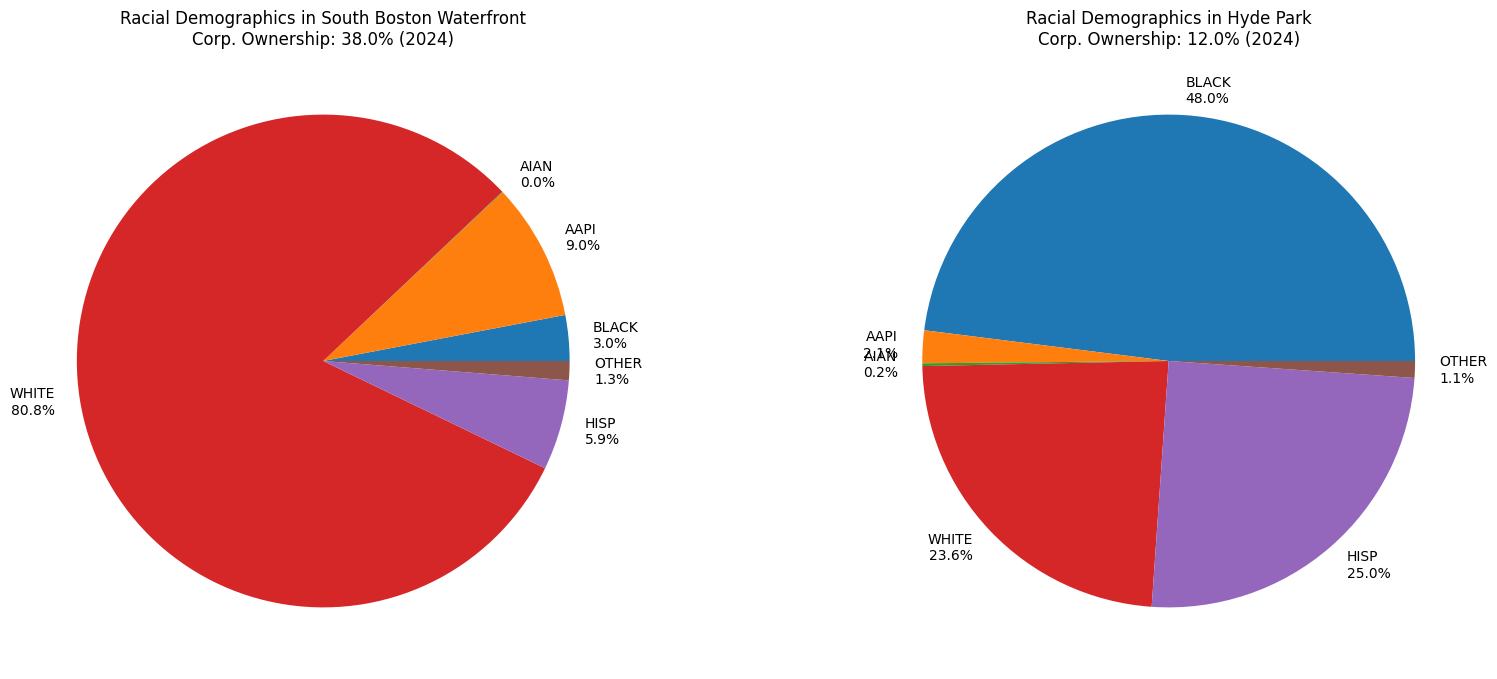

In [24]:
def compare_neighborhoods(neighborhood1, neighborhood2):
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    
    # Create subplot with 2 pie charts side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    
    # Plot first neighborhood
    df1 = df[df['Neighborhood'] == neighborhood1]
    latest_year = df1['Year'].max()
    df1 = df1[df1['Year'] == latest_year]
    races = get_races()
    values = df1[races].values[0]
    total = values.sum()
    percentages = [f'{race.split("_")[0].upper()}\n{val/total*100:.1f}%' for race, val in zip(races, values)]
    ax1.pie(values, labels=percentages, autopct='')
    ax1.set_title(f'Racial Demographics in {neighborhood1}\nCorp. Ownership: {df1["corp_own_rate"].values[0]:.1%} ({latest_year})')
    
    # Plot second neighborhood
    df2 = df[df['Neighborhood'] == neighborhood2]
    df2 = df2[df2['Year'] == latest_year]
    values = df2[races].values[0]
    total = values.sum()
    percentages = [f'{race.split("_")[0].upper()}\n{val/total*100:.1f}%' for race, val in zip(races, values)]
    ax2.pie(values, labels=percentages, autopct='')
    ax2.set_title(f'Racial Demographics in {neighborhood2}\nCorp. Ownership: {df2["corp_own_rate"].values[0]:.1%} ({latest_year})')
    
    plt.savefig('figs/q3/piechart_comparison.png')
    plt.show()

# Example usage 
compare_neighborhoods('South Boston Waterfront', 'Hyde Park')

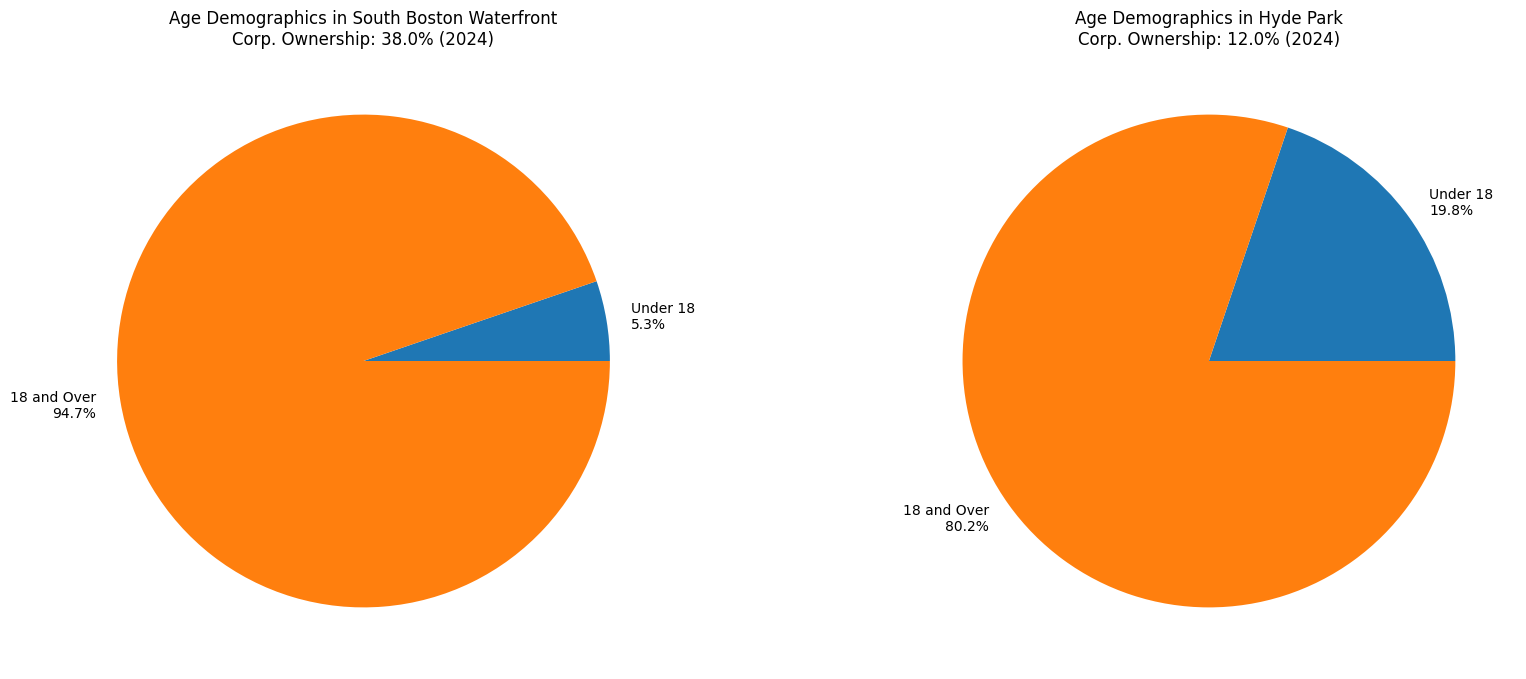

In [25]:
def compare_neighborhoods(neighborhood1, neighborhood2):
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    
    # Create subplot with 2 pie charts side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    
    # Plot first neighborhood
    df1 = df[df['Neighborhood'] == neighborhood1]
    latest_year = df1['Year'].max()
    df1 = df1[df1['Year'] == latest_year]
    
    age_groups = ['tot_pop_0_17', 'tot_pop_18plus']
    values = df1[age_groups].values[0]
    total = values.sum()
    percentages = [f'{"Under 18" if i==0 else "18 and Over"}\n{val/total*100:.1f}%' for i, val in enumerate(values)]
    ax1.pie(values, labels=percentages, autopct='')
    ax1.set_title(f'Age Demographics in {neighborhood1}\nCorp. Ownership: {df1["corp_own_rate"].values[0]:.1%} ({latest_year})')
    
    # Plot second neighborhood
    df2 = df[df['Neighborhood'] == neighborhood2]
    df2 = df2[df2['Year'] == latest_year]
    values = df2[age_groups].values[0]
    total = values.sum()
    percentages = [f'{"Under 18" if i==0 else "18 and Over"}\n{val/total*100:.1f}%' for i, val in enumerate(values)]
    ax2.pie(values, labels=percentages, autopct='')
    ax2.set_title(f'Age Demographics in {neighborhood2}\nCorp. Ownership: {df2["corp_own_rate"].values[0]:.1%} ({latest_year})')
    
    plt.savefig('figs/q3/piechart_age.png')
    plt.show()

# Example usage 
compare_neighborhoods('South Boston Waterfront', 'Hyde Park')

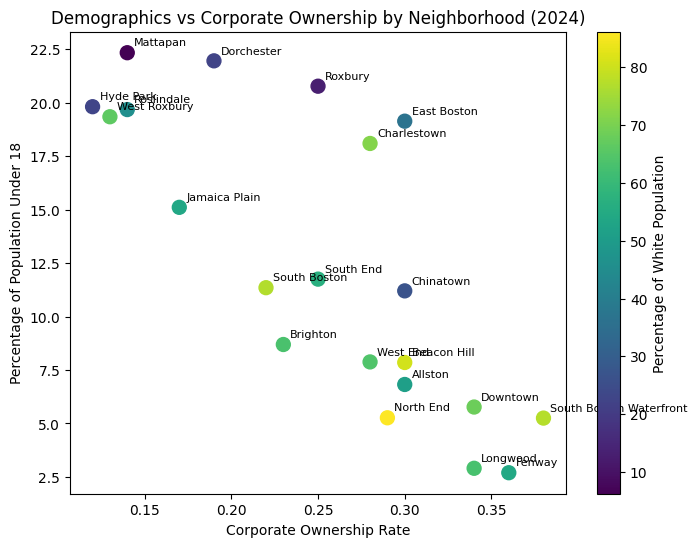

In [31]:
def demo_scat():
    df = pd.read_csv('A2 (EDA) Datasets/Corporate ownership rates and owner occupancy rates in Boston neighborhoods, 2004-2024/Census_and_Corp_Ownership_and_Occupancy_Over_Time.csv')
    
    # Filter for latest year
    latest_year = df['Year'].max()
    df = df[df['Year'] == latest_year]
    
    # Calculate percentage under 18
    df['pct_under_18'] = df['tot_pop_0_17'] / (df['tot_pop_0_17'] + df['tot_pop_18plus']) * 100
    
    # Calculate percentage white
    df['pct_white'] = df['white_all'] / df['tot_pop_all'] * 100
    
    # Create scatter plot
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(df['corp_own_rate'], df['pct_under_18'], 
                         c=df['pct_white'], cmap='viridis',
                         s=100)
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Percentage of White Population')
    
    # Add labels for each point
    for idx, row in df.iterrows():
        plt.annotate(row['Neighborhood'], 
                    (row['corp_own_rate'], row['pct_under_18']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)
    
    plt.xlabel('Corporate Ownership Rate')
    plt.ylabel('Percentage of Population Under 18')
    plt.title(f'Demographics vs Corporate Ownership by Neighborhood ({latest_year})')
    
    plt.savefig('figs/q3/demographics_scatter.png')
    plt.show()

# Generate plot
demo_scat()